<a href="https://colab.research.google.com/github/Sindhujashree-17/SCT_DS_TASKS/blob/main/SCT_DS_TASK04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv("/content/drive/MyDrive/accident.csv")

In [14]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [10]:
try:
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
except Exception as e:
    print(f"Error converting time: {e}")

data['Hour'] = data['Time'].dt.hour

In [11]:

road_weather_group = data.groupby(['Road_surface_conditions', 'Weather_conditions', 'Hour']).size().reset_index(name='Accident_Count')

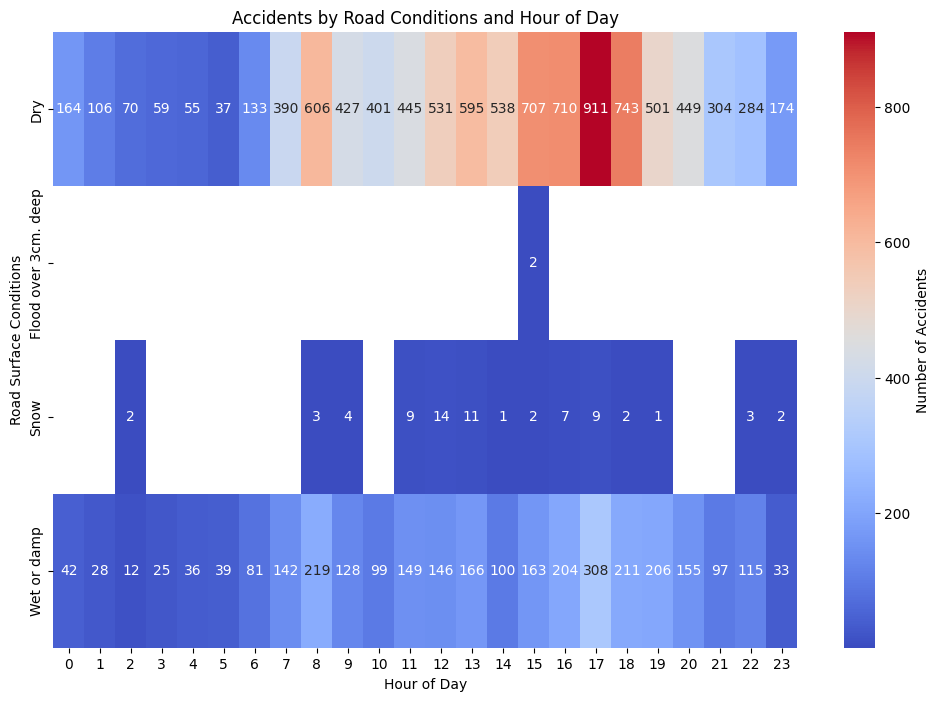

In [5]:
heatmap_data = road_weather_group.pivot_table(index='Road_surface_conditions', columns='Hour', values='Accident_Count', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Accidents'})
plt.title('Accidents by Road Conditions and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Road Surface Conditions')
plt.show()

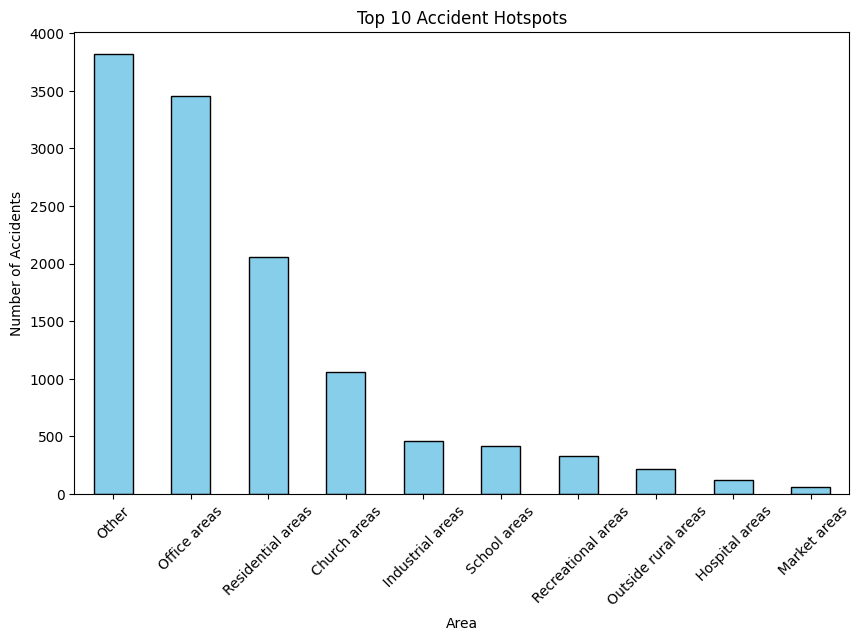

In [6]:
area_accident_group = data['Area_accident_occured'].value_counts().head(10)
plt.figure(figsize=(10, 6))
area_accident_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Accident Hotspots')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

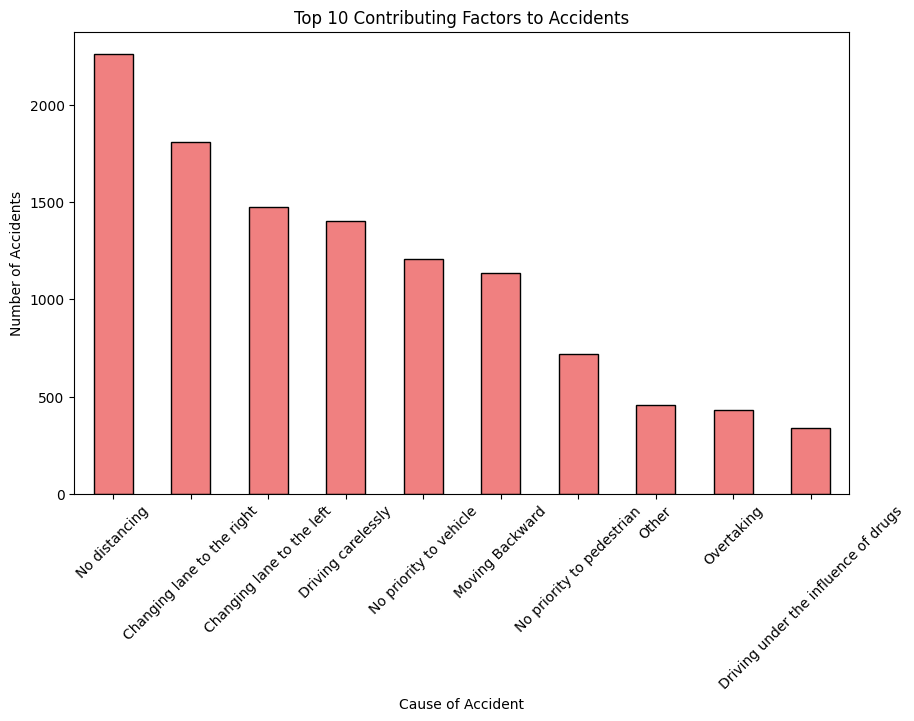

In [7]:
factors_group = data['Cause_of_accident'].value_counts().head(10)
plt.figure(figsize=(10, 6))
factors_group.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Contributing Factors to Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [12]:
os.makedirs('/mnt/data', exist_ok=True)

In [13]:
data.to_csv('/mnt/data/cleaned_accident_data.csv', index=False)

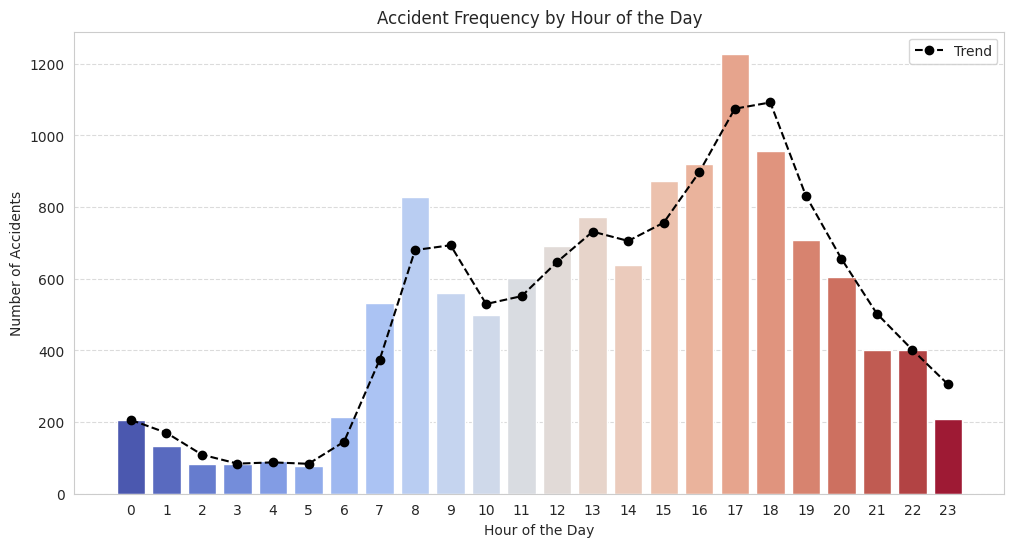

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Change 'df' to 'data' to reference the existing dataframe
df_cleaned = data.copy()

df_cleaned['Hour'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S', errors='coerce').dt.hour

df_cleaned = df_cleaned.dropna(subset=['Hour'])

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x=df_cleaned['Hour'], hue=df_cleaned['Hour'], palette='coolwarm', legend=False)
hourly_accidents = df_cleaned['Hour'].value_counts().sort_index()
plt.plot(hourly_accidents.index, hourly_accidents.rolling(window=2, min_periods=1).mean(),
         color='black', marker='o', linestyle='dashed', label='Trend')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accident Frequency by Hour of the Day')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

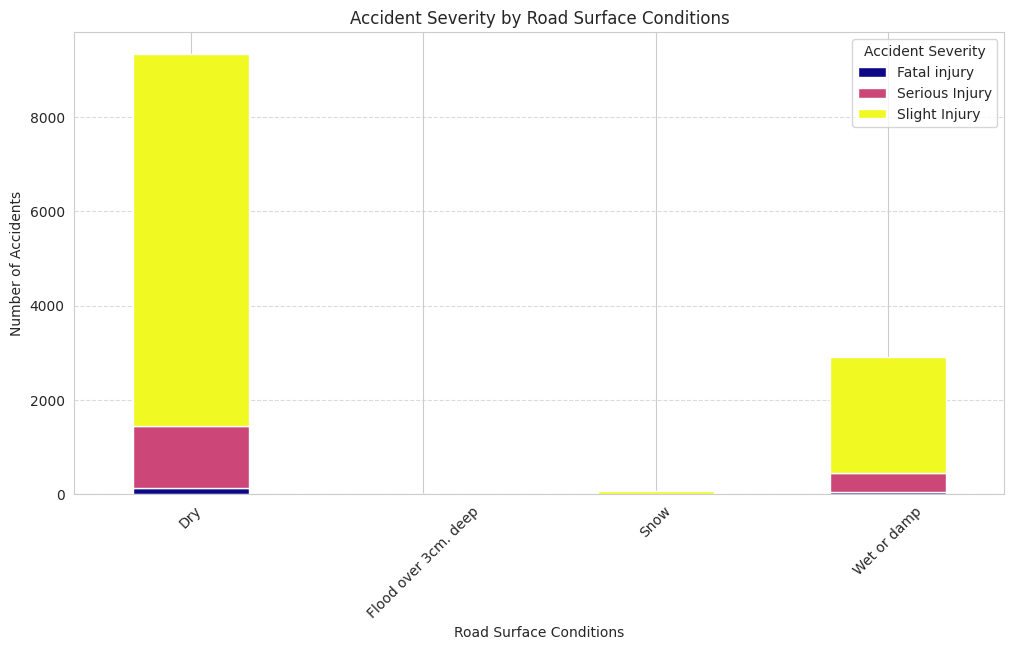

In [20]:
import matplotlib.pyplot as plt

road_severity = df_cleaned.groupby(['Road_surface_conditions', 'Accident_severity']).size().unstack()

ax = road_severity.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,6))

ax.set_xlabel('Road Surface Conditions')
ax.set_ylabel('Number of Accidents')
ax.set_title('Accident Severity by Road Surface Conditions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title="Accident Severity")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()